In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
olympic_data = pd.read_csv('data/olympics_clean.csv')
olympic_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Country_Name,NOC,Population,GDP per Capita,ISO_Code
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460,348.0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985170,40.0
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230580,300.0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230580,300.0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230580,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,Poland,POL,37999494.0,12554.547550,616.0
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Iran,IRI,79109272.0,NaN,364.0
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,Russia,RUS,144096812.0,9092.580536,NaN
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,Armenia,ARM,3017712.0,3489.127690,51.0


# Medals by Country Over Time

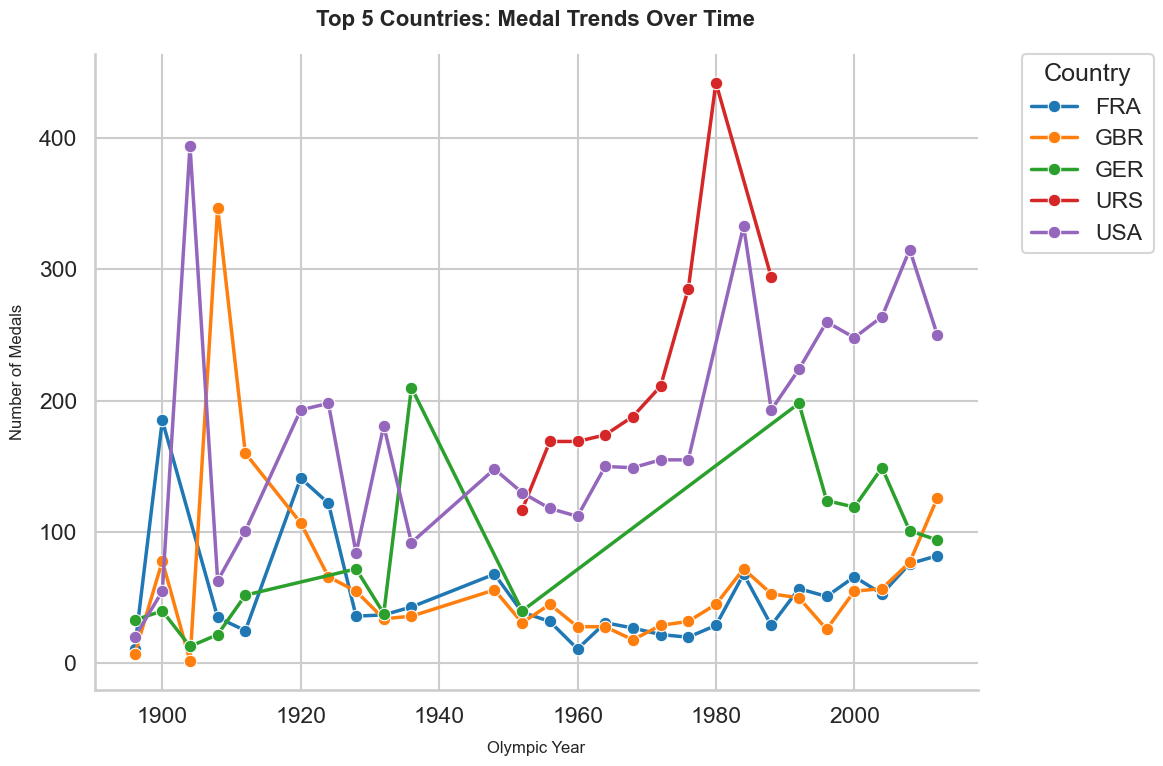

In [ ]:
# Group by country and year, count medals
medals_by_country_year = olympic_data.groupby(['Country', 'Year'], as_index=False)['Medal'].count()

# Get top 5 countries by total medal count
total_medals_by_country = olympic_data.groupby('Country', as_index=False)['Medal'].count()
top_5 = (
    medals_by_country_year.groupby('Country', as_index=False)['Medal'].sum()  # pyright: ignore[reportCallIssue]
    .sort_values(by='Medal', ascending=False) 
    .head(5)['Country']
)

# Filter data for these top countries
medals_subset = medals_by_country_year[medals_by_country_year['Country'].isin(top_5)]

# Set Seaborn style
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=medals_subset,
    x='Year',
    y='Medal',
    hue='Country',
    marker='o',
    linewidth=2.5,
    palette='tab10'
)

plt.title("Top 5 Countries: Medal Trends Over Time", fontsize=16, weight='bold', pad=20)
plt.xlabel("Olympic Year", fontsize=12, labelpad=10)
plt.ylabel("Number of Medals", fontsize=12, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Country")
sns.despine()
plt.tight_layout()
plt.show()
